In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# For ignoring warnings
import warnings
warnings.filterwarnings('ignore')



In [2]:
# Load the dataset
df = pd.read_csv(r'C:\Users\adrit\OneDrive\Desktop\Codeissance\data15.csv')

# Display first few rows
df.head()


,Transaction ID,Customer ID,Customer Name,Receiver ID,Receiver Name,Transaction Amount,Date,Transaction Type,Country of Origin,Country of Destination,Risk Level,Method of Payment,Previous Flags,Suspicious Activity
0,63673182,47694,Grace Hahn,97761,Victoria Carlson,807.317688,2024-01-02,Transfer,Turkmenistan,Slovakia (Slovak Republic),Low,Credit Card,0,No
1,3019500,47694,Grace Hahn,65343,Jacob Munoz II,788.356012,2024-01-12,Withdrawal,Mozambique,Seychelles,Low,Cash,0,No
2,91955970,47694,Grace Hahn,66521,Jaclyn Knight,693.950107,2024-01-19,Transfer,Yemen,Central African Republic,Low,Cash,0,No
3,66456644,47694,Grace Hahn,10637,Joshua Wiley,717.476048,2024-02-04,Withdrawal,Nigeria,Kenya,Low,Credit Card,0,No
4,33015098,47694,Grace Hahn,32415,Amy Maldonado,638.440226,2024-02-20,Withdrawal,Denmark,South Georgia and the South Sandwich Islands,Low,Bank Transfer,0,No


In [3]:
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Data types
print("\nData types of each column:")
print(df.dtypes)


The dataset contains 240 rows and 14 columns.

Missing values in each column:
Transaction ID            0
Customer ID               0
Customer Name             0
Receiver ID               0
Receiver Name             0
Transaction Amount        0
Date                      0
Transaction Type          0
Country of Origin         0
Country of Destination    0
Risk Level                0
Method of Payment         0
Previous Flags            0
Suspicious Activity       0
dtype: int64

Data types of each column:
Transaction ID              int64
Customer ID                 int64
Customer Name              object
Receiver ID                 int64
Receiver Name              object
Transaction Amount        float64
Date                       object
Transaction Type           object
Country of Origin          object
Country of Destination     object
Risk Level                 object
Method of Payment          object
Previous Flags              int64
Suspicious Activity        object
dtype: object

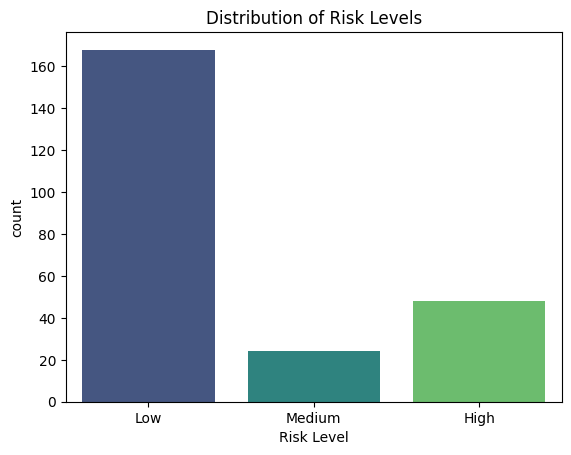

In [4]:
# Plot the distribution of risk levels
sns.countplot(x='Risk Level', data=df, palette='viridis')
plt.title('Distribution of Risk Levels')
plt.show()


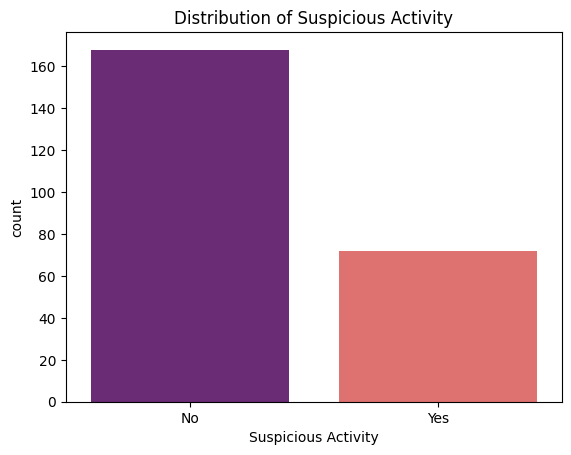

In [5]:
# Plot the distribution of suspicious activity
sns.countplot(x='Suspicious Activity', data=df, palette='magma')
plt.title('Distribution of Suspicious Activity')
plt.show()


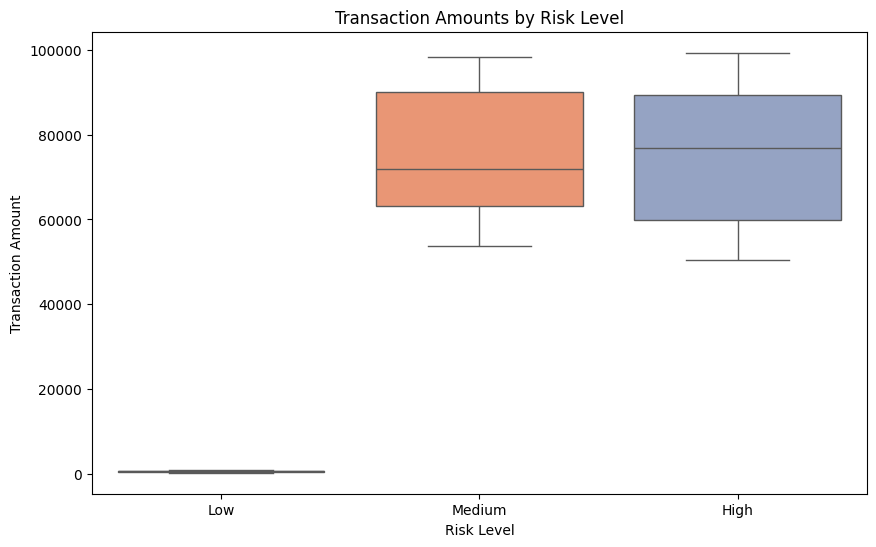

In [6]:
# Boxplot of transaction amounts by risk level
plt.figure(figsize=(10, 6))
sns.boxplot(x='Risk Level', y='Transaction Amount', data=df, palette='Set2')
plt.title('Transaction Amounts by Risk Level')
plt.show()


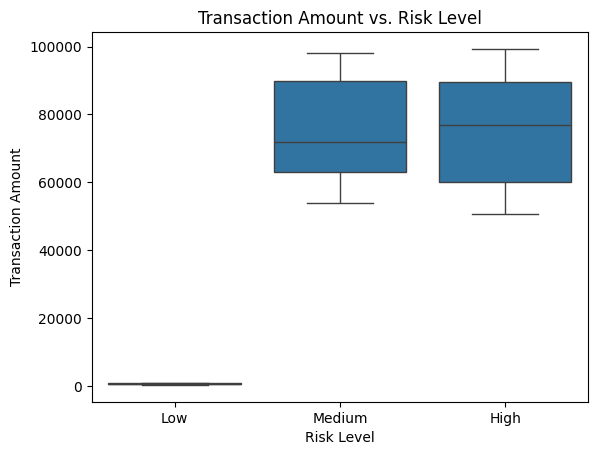

In [7]:
# Visualize the relationship between Transaction Amount and Risk Level
sns.boxplot(x='Risk Level', y='Transaction Amount', data=df)
plt.title('Transaction Amount vs. Risk Level')
plt.show()

In [8]:
# Encoding Customer ID and Receiver ID using LabelEncoder
le = LabelEncoder()
df['Customer ID'] = le.fit_transform(df['Customer ID'])
df['Receiver ID'] = le.fit_transform(df['Receiver ID'])

# Scaling the Transaction Amount
scaler = StandardScaler()
df['Transaction Amount'] = scaler.fit_transform(df[['Transaction Amount']])

# Encode Risk Level (Target Variable 1) and Suspicious Activity (Target Variable 2)
df['Risk Level'] = df['Risk Level'].map({'Low': 0, 'Medium': 1, 'High': 2})
df['Suspicious Activity'] = df['Suspicious Activity'].map({'No': 0, 'Yes': 1})

# Define features (X) and target variables (y1 for Risk Level, y2 for Suspicious Activity)
X = df[['Customer ID', 'Receiver ID', 'Transaction Amount']]
y1 = df['Risk Level']
y2 = df['Suspicious Activity']


In [9]:
# Split the data into training and testing sets for Risk Level classification
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.3, random_state=42)

# Split the data for Suspicious Activity classification
_, _, y2_train, y2_test = train_test_split(X, y2, test_size=0.3, random_state=42)


In [10]:
# Initialize RandomForestClassifier
rf_risk = RandomForestClassifier(n_estimators=100, random_state=42)
rf_suspicious = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data for Risk Level classification
rf_risk.fit(X_train, y1_train)

# Train the model on the training data for Suspicious Activity classification
rf_suspicious.fit(X_train, y2_train)


RandomForestClassifier(random_state=42)

In [11]:
# Predict on test data for Risk Level classification
y1_pred = rf_risk.predict(X_test)

# Predict on test data for Suspicious Activity classification
y2_pred = rf_suspicious.predict(X_test)

# Classification report for Risk Level
print("Classification Report for Risk Level:")
print(classification_report(y1_test, y1_pred))

# Confusion matrix for Risk Level
print("Confusion Matrix for Risk Level:")
print(confusion_matrix(y1_test, y1_pred))

# Classification report for Suspicious Activity
print("\nClassification Report for Suspicious Activity:")
print(classification_report(y2_test, y2_pred))

# Confusion matrix for Suspicious Activity
print("Confusion Matrix for Suspicious Activity:")
print(confusion_matrix(y2_test, y2_pred))


Classification Report for Risk Level:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.00      0.00      0.00         6
           2       0.54      0.54      0.54        13

    accuracy                           0.83        72
   macro avg       0.51      0.51      0.51        72
weighted avg       0.83      0.83      0.83        72

Confusion Matrix for Risk Level:
[[53  0  0]
 [ 0  0  6]
 [ 0  6  7]]

Classification Report for Suspicious Activity:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        19

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72

Confusion Matrix for Suspicious Activity:
[[53  0]
 [ 0 19]]


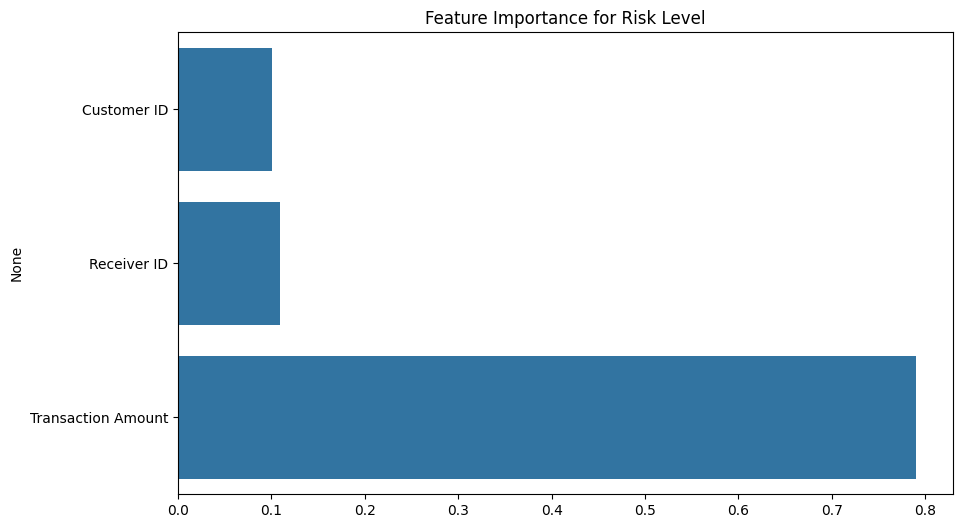

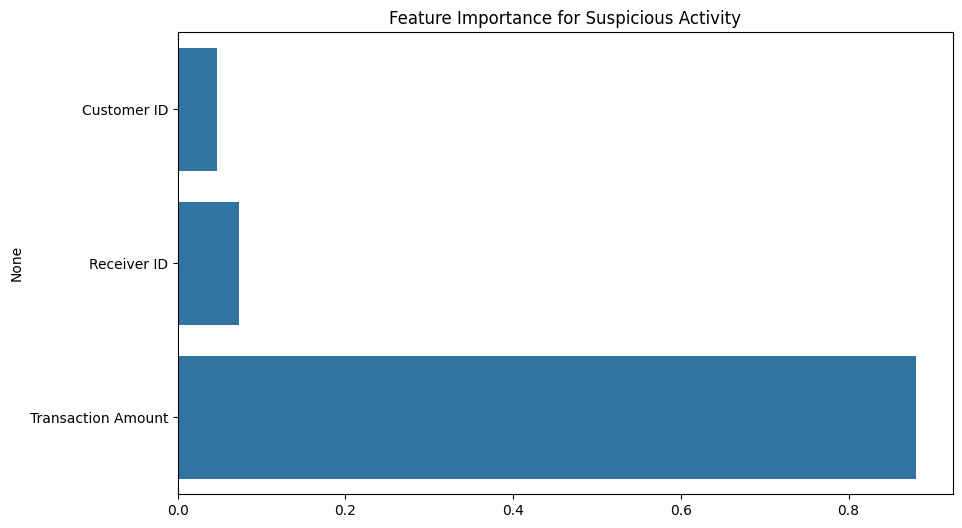

In [12]:
# Feature importance for Risk Level classification
plt.figure(figsize=(10, 6))
sns.barplot(x=rf_risk.feature_importances_, y=X.columns)
plt.title('Feature Importance for Risk Level')
plt.show()

# Feature importance for Suspicious Activity classification
plt.figure(figsize=(10, 6))
sns.barplot(x=rf_suspicious.feature_importances_, y=X.columns)
plt.title('Feature Importance for Suspicious Activity')
plt.show()


In [13]:
from sklearn.metrics import accuracy_score

# Accuracy for Risk Level classification
risk_accuracy = accuracy_score(y1_test, y1_pred)
print(f'Accuracy for Risk Level classification: {risk_accuracy:.4f}')

# Accuracy for Suspicious Activity classification
suspicious_accuracy = accuracy_score(y2_test, y2_pred)
print(f'Accuracy for Suspicious Activity classification: {suspicious_accuracy:.4f}')


Accuracy for Risk Level classification: 0.8333
Accuracy for Suspicious Activity classification: 1.0000


In [14]:
# Example new input data (modify this to your specific case)
new_data = {
    'Customer ID': ['47694'],  
    'Receiver ID': ['65343'], 
    'Transaction Amount': [67890]  # Input transaction amount
}

# Convert to DataFrame
new_data_df = pd.DataFrame(new_data)

# Preprocess new input (just like you did for the training data)
new_data_df['Customer ID'] = le.transform(new_data_df['Customer ID'])
new_data_df['Receiver ID'] = le.transform(new_data_df['Receiver ID'])
new_data_df['Transaction Amount'] = scaler.transform(new_data_df[['Transaction Amount']])

# Make predictions using the trained models
risk_level_prediction = rf_risk.predict(new_data_df)
suspicious_activity_prediction = rf_suspicious.predict(new_data_df)

# Map the predictions back to original labels
risk_level_mapping = {0: 'Low', 1: 'Medium', 2: 'High'}
suspicious_activity_mapping = {0: 'No', 1: 'Yes'}

predicted_risk_level = risk_level_mapping[risk_level_prediction[0]]
predicted_suspicious_activity = suspicious_activity_mapping[suspicious_activity_prediction[0]]

# Print predictions
print(f"Predicted Risk Level: {predicted_risk_level}")
print(f"Predicted Suspicious Activity: {predicted_suspicious_activity}")


Predicted Risk Level: Medium
Predicted Suspicious Activity: Yes


In [15]:
# Dictionary to store transaction history for each customer-receiver pair
transaction_history = {}

# Function to check and update transaction history
def update_transaction_history(customer_id, receiver_id, amount, predicted_risk_level):
    pair = (customer_id, receiver_id)
    
    # If the pair has a previous transaction
    if pair in transaction_history:
        previous_risk_level, previous_amount = transaction_history[pair]
        
        # Check if previous transaction was medium risk and the current one is large
        if previous_risk_level == 'Medium' and amount > 50000:  # Define 'large' amount threshold
            return 'High'  # Classify this transaction as High Risk
        
    # Update the history with the current transaction
    transaction_history[pair] = (predicted_risk_level, amount)
    return predicted_risk_level


In [20]:
# New transaction input
new_data = {
    'Customer ID': ['47694'],    # Input customer ID
    'Receiver ID': ['65343'],    # Input receiver ID
    'Transaction Amount': [54361]  # Input transaction amount
}

# Convert to DataFrame
new_data_df = pd.DataFrame(new_data)

# Preprocess the input just like the training data
new_data_df['Customer ID'] = le.transform(new_data_df['Customer ID'])
new_data_df['Receiver ID'] = le.transform(new_data_df['Receiver ID'])
new_data_df['Transaction Amount'] = scaler.transform(new_data_df[['Transaction Amount']])

# Make initial predictions
risk_level_prediction = rf_risk.predict(new_data_df)
predicted_risk_level = risk_level_mapping[risk_level_prediction[0]]

# Check and update transaction history for the customer-receiver pair
customer_id = new_data['Customer ID'][0]
receiver_id = new_data['Receiver ID'][0]
amount = new_data['Transaction Amount'][0]

# Adjust the risk level based on the transaction history
adjusted_risk_level = update_transaction_history(customer_id, receiver_id, amount, predicted_risk_level)

# Output the final adjusted risk level
print(f"Final Predicted Risk Level: {adjusted_risk_level}")

# For Suspicious Activity
suspicious_activity_prediction = rf_suspicious.predict(new_data_df)
predicted_suspicious_activity = suspicious_activity_mapping[suspicious_activity_prediction[0]]

# Output Suspicious Activity prediction
print(f"Predicted Suspicious Activity: {predicted_suspicious_activity}")


Final Predicted Risk Level: High
Predicted Suspicious Activity: Yes


In [17]:
import pickle

# Create a dictionary to hold both models
models = {
    'rf_risk': rf_risk,
    'rf_suspicious': rf_suspicious
}

# Save the models to a single .pkl file
with open('models.pkl', 'wb') as model_file:
    pickle.dump(models, model_file)

print("Models saved successfully!")


Models saved successfully!


In [18]:
import pickle

# Save the Risk Level model
with open('rf_risk_model.pkl', 'wb') as risk_file:
    pickle.dump(rf_risk, risk_file)

# Save the Suspicious Activity model
with open('rf_suspicious_model.pkl', 'wb') as suspicious_file:
    pickle.dump(rf_suspicious, suspicious_file)

print("Both models saved successfully!")


Both models saved successfully!


In [19]:
import joblib

# Create a dictionary with all the components
model_bundle = {
    'rf_risk': rf_risk,
    'rf_suspicious': rf_suspicious,
    'label_encoder': le,
    'scaler': scaler
}

# Save the dictionary as a single .pkl file
joblib.dump(model_bundle, 'model_bundle.pkl')


['model_bundle.pkl']